In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import os
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
# For the traning data file contact the author (radaideh@umich.edu)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Define the input column and output column.
text_column = 'text'
label_column = 'label'


In [39]:
# Function for the pre-processing
def preprocess_text(text):
    # Conversion to the lowercase.
    text = text.lower()
    # Remove all the special characters.
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove all the stop words (and, or, with)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Stemmize and Lemmatize
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    return ' '.join(stemmed_tokens)

# Preprocess the data
train[text_column]=train[text_column].apply(preprocess_text)
test[text_column]=test[text_column].apply(preprocess_text)
# Combine training and testing text for vectorization so they both have the same number of features
X = pd.concat([train[text_column], test[text_column]],axis=0)
# Vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)
# training data
X_train = X_vectorized[:len(train)]
y_train = train[label_column]
# Testing data
X_test = X_vectorized[len(train):]
y_test = test[label_column]

In [41]:
# Classifier model compile
def run_classifier(model):
    model.fit(X_train, y_train)
    # Prediction
    y_pred = model.predict(X_test)
    # Classification Accuarcy
    accuracy = accuracy_score(y_test, y_pred)
    # Classification Report
    classification_rep = classification_report(y_test, y_pred)
    # Confusion Matrix computation
    conf_matrix = confusion_matrix(y_test, y_pred)
    # List of the label
    class_names = model.classes_
    # Confusion Matrix visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.title('Confusion Matrix')

    # Let us save the image file
    output_directory = 'Confusion_Matrix'
    output_filename = 'cm_RandomForest'
    output_path = os.path.join(output_directory,output_filename)
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    plt.savefig(output_path)
    return accuracy, classification_rep



Random Forest Classifier
Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

    negative       0.80      0.72      0.76       400
     neutral       0.67      0.84      0.75       400
    positive       0.85      0.72      0.78       400

    accuracy                           0.76      1200
   macro avg       0.77      0.76      0.76      1200
weighted avg       0.77      0.76      0.76      1200



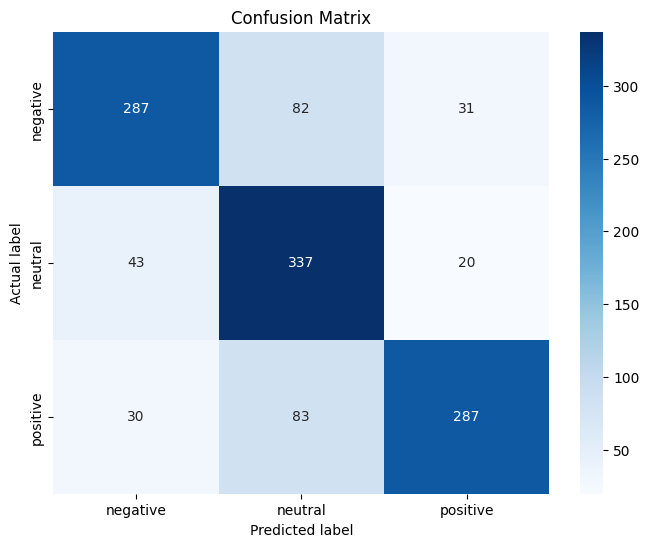

In [42]:
# Random Forest
rfc = RandomForestClassifier(n_estimators=100)
accuracy, classification_rep = run_classifier(rfc)
print("Random Forest Classifier")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)


Support Vector Classifier
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

    negative       0.77      0.76      0.76       400
     neutral       0.70      0.73      0.72       400
    positive       0.79      0.77      0.78       400

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.75      1200



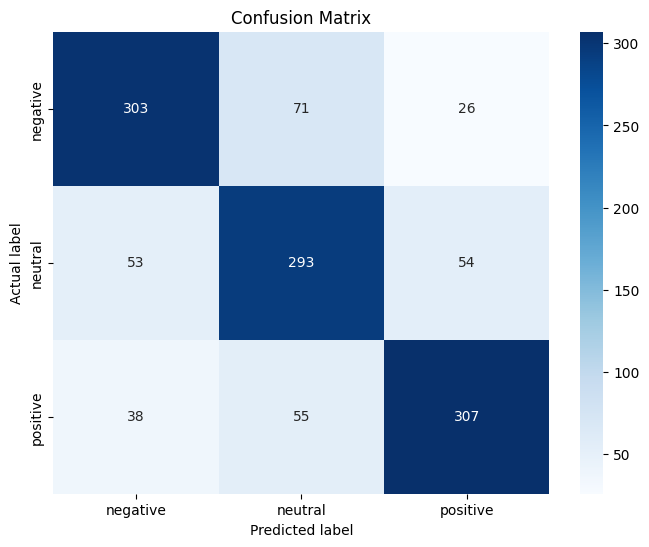

In [43]:
# Support Vector Classifier
svc = SVC()
accuracy, classification_rep = run_classifier(svc)
print("Support Vector Classifier")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)